In [119]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


df= pd.read_excel('Gold_price.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 847 non-null    object 
 1   Price (USD)          847 non-null    float64
 2   square of Distance   847 non-null    float64
dtypes: float64(2), object(1)
memory usage: 20.0+ KB


In [120]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 847 non-null    datetime64[ns]
 1   Price (USD)          847 non-null    float64       
 2   square of Distance   847 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 20.0 KB


In [121]:
def SMA(window_size, df_column):
    moving_average = df_column.rolling(window=window_size+1).mean()
    return moving_average

In [122]:
ma = SMA(4, df['Price (USD)'])
ma

0            NaN
1            NaN
2            NaN
3            NaN
4        34.7300
         ...    
842    1541.0392
843    1582.6610
844    1629.7954
845    1664.4682
846    1712.8660
Name: Price (USD), Length: 847, dtype: float64

In [123]:
df['SMA'] = ma
df= df.dropna()
df

,Date,Price (USD),square of Distance,SMA
4,1950-05-01,34.730,1.457918e+05,34.7300
5,1950-06-01,34.730,1.457918e+05,34.7300
6,1950-07-01,34.730,1.457918e+05,34.7300
7,1950-08-01,34.730,1.457918e+05,34.7300
8,1950-09-01,34.730,1.457918e+05,34.7300
...,...,...,...,...
842,2020-03-01,1593.764,1.385817e+06,1541.0392
843,2020-04-01,1680.030,1.596364e+06,1582.6610
844,2020-05-01,1715.697,1.687765e+06,1629.7954
845,2020-06-01,1734.032,1.735741e+06,1664.4682


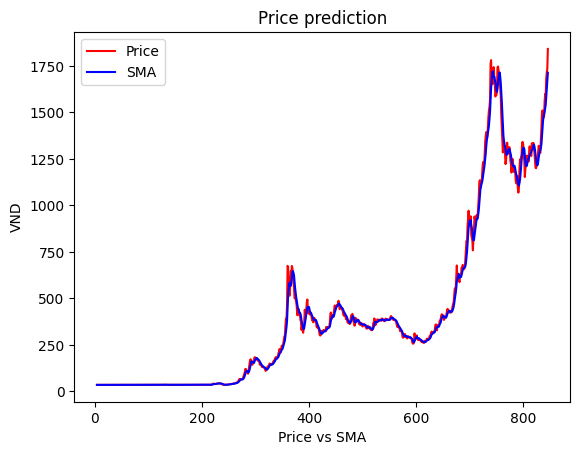

In [124]:
plt.plot(df['Price (USD)'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.title("Price prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [125]:
df['Date'] = pd.to_numeric(df['Date'])

In [126]:
lm = LinearRegression()
X = df['Date'].values.reshape(-1, 1)
Y = df['Price (USD)'].values


In [127]:
lm.fit(X, Y)
Y_predict = lm.predict(X)

In [128]:
df["LinearRegression"] = Y_predict

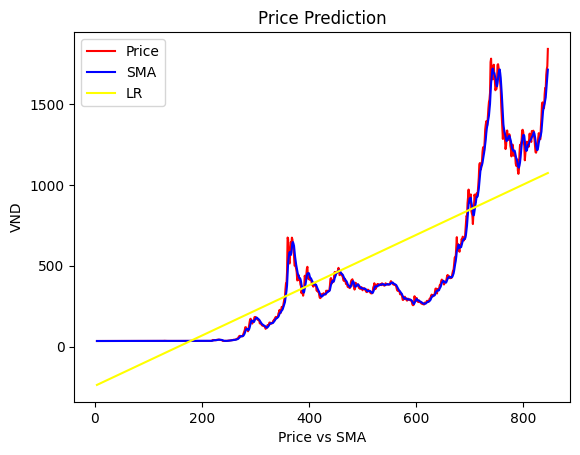

In [129]:
plt.plot(df['Price (USD)'], color='red', label='Price')
plt.plot(df['SMA'], color='blue', label='SMA')
plt.plot(df['LinearRegression'], color='yellow', label='LR')

plt.title("Price Prediction")
plt.xlabel("Price vs SMA")
plt.ylabel("VND")
plt.legend()

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(df["Price (USD)"], Y_predict)
rmse = mean_squared_error(df["Price (USD)"], Y_predict, squared=False)
mae = mean_absolute_error(df["Price (USD)"], Y_predict)
mape = mean_absolute_percentage_error(df["Price (USD)"], Y_predict)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape*100}%")

Mean Squared Error: 62421.81833106972
Root Mean Squared Error: 249.84358773254462
Mean Absolute Error: 192.54750875593825
Mean Absolute Percentage Error: 135.93579662601428%


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
